In [1]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install descartes - Geopandas requirment
!pip install descartes
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install tools to use in notebook
!pip install mapclassify
!pip install palettable
!pip install contextily

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.5 MB/s eta 0:00:00a 0:00:01
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.4 MB/s eta 0:00:00a 0:00:01
  Cloning git://github.com/geopandas/geopandas.git to /private/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/pip-req-build-44rn_s8t
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /private/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/pip-req-build-44rn_s8t
  fatal: unab

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
import requests
import os

f = "./content/"

if 'content' not in os.listdir("./"):
    os.mkdir(f)

url = "https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/urbana/SHP_2/Sonora/702825317744_s.zip"
r = requests.get(url, allow_redirects=True)

open(f+'702825317744_s.zip', 'wb').write(r.content)

18798245

In [14]:
zip_path=f+'702825317744_s.zip'

In [15]:
import zipfile 

with zipfile.ZipFile(zip_path, 'r') as outer_zip:
    outer_zip.extractall(f+'extracted')


/Users/federicocirett/Documents/Master/MCD2024/01_IC_2024/Libretas/Geopandas/.venv/lib/python3.9/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '260300001.zip': '260300001a' (default), '260300001as', '260300001fm', '260300001l', '260300001m', '260300001ne', '260300001sia', '260300001sip', '260300001v'. Specify layer parameter to avoid this warning.
  result = read_func(


DataSourceError: '/vsizip/./content/extracted/260300535.zip' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [25]:

for file in os.listdir(f+'extracted'):
    if '.pdf' in file:
        continue
    with zipfile.ZipFile(f+'extracted/'+file, 'r') as inner_zip:
        inner_zip.extractall(f+'guts/'+file[:-4])
    print(f'{file} extraído!')

print(os.listdir(f+'extracted'))



   
    



260300001.zip extraído!
260300535.zip extraído!
260300137.zip extraído!
260300343.zip extraído!
['260300001.zip', '260300535.zip', '260300137.zip', 'FICHA TÉCNICA LOC  AMANZANADAS Y NUM  EXT (28feb2011).pdf', '260300343.zip']


## Ejercicio 1

<Axes: title={'center': 'Hermosillo'}>

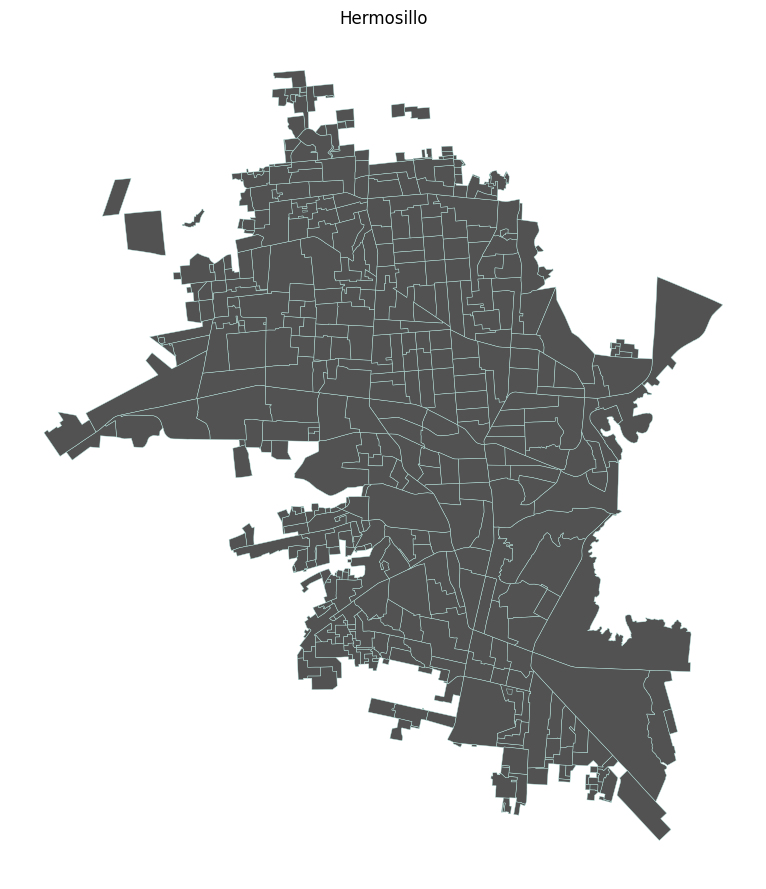

In [86]:
file_path=f+"guts/260300001/260300001a.shp"
ageb_hermosillo=gpd.read_file(file_path)

fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='#525252',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila
)






## Ejercicio 2

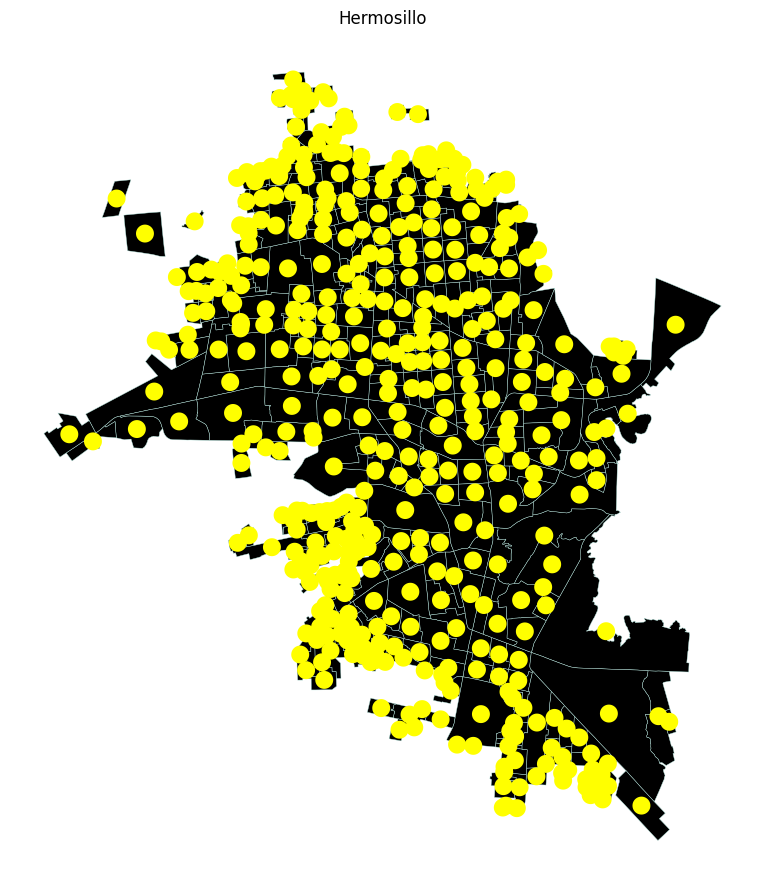

In [87]:
fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='black',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila
)

ageb_hermosillo.centroid.buffer(250).plot(
    color='yellow',
    ax=fila
    
)

plt.show()

## Ejercicio 3

In [81]:

numeros_externos=gpd.read_file(f+"guts/260300001/260300001ne.shp")
servicios_area=gpd.read_file(f+"guts/260300001/260300001sia.shp")
servicios_punto=gpd.read_file(f+"guts/260300001/260300001sip.shp")
vialidades=gpd.read_file(f+"guts/260300001/260300001v.shp")
manzana=gpd.read_file(f+"guts/260300001/260300001m.shp")
frente_manzana=gpd.read_file(f+"guts/260300001/260300001fm.shp")
localidad=gpd.read_file(f+"guts/260300001/260300001l.shp")
asentamiento=gpd.read_file(f+"guts/260300001/260300001as.shp")





In [95]:
servicios_area.head(3)

,GEOGRAFICO,NOMBRE,FECHAACT,CODIGO,GEOMETRIA,INSTITUC,TIPO,geometry
0,SERVICIO_A,NINGUNO,01/2010,6145,ÁREA,INEGI,ÁREA VERDE,"POLYGON ((1623777.089 1922395.176, 1623871.282..."
1,SERVICIO_A,HOSPITAL MATERNO,12/2009,6316,ÁREA,INEGI,CENTRO DE ASISTENCIA MÉDICA,"POLYGON ((1627550.002 1919681.507, 1627557.205..."
2,SERVICIO_A,ESCUELA PRIMARIA,12/2009,6322,ÁREA,INEGI,ESCUELA,"POLYGON ((1627295.206 1919188.707, 1627303.053..."


In [96]:
servicios_punto.head(3)

,GEOGRAFICO,NOMBRE,FECHAACT,CODIGO,GEOMETRIA,INSTITUC,TIPO,geometry
0,SERVICIO_P,SIN NOMBRE,11/2009,342,PUNTO,INEGI,TEMPLO,POINT (1628684.205 1920127.453)
1,SERVICIO_P,NINGUNO,11/2009,322,PUNTO,INEGI,ESCUELA,POINT (1628781.019 1919908.125)
2,SERVICIO_P,IGLESIA DE CRISTO,11/2009,342,PUNTO,INEGI,TEMPLO,POINT (1628712.261 1919852.019)


In [126]:
iglesias=servicios_punto[servicios_punto['TIPO']=='TEMPLO']
iglesias['NUMERO_DE_IGLESIAS']=iglesias['NOMBRE'].map(iglesias['NOMBRE'].value_counts())
iglesias.head(3)

/Users/federicocirett/Documents/Master/MCD2024/01_IC_2024/Libretas/Geopandas/.venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOGRAFICO,NOMBRE,FECHAACT,CODIGO,GEOMETRIA,INSTITUC,TIPO,geometry,NUMERO_DE_IGLESIAS
0,SERVICIO_P,SIN NOMBRE,11/2009,342,PUNTO,INEGI,TEMPLO,POINT (1628684.205 1920127.453),19
2,SERVICIO_P,IGLESIA DE CRISTO,11/2009,342,PUNTO,INEGI,TEMPLO,POINT (1628712.261 1919852.019),2
5,SERVICIO_P,SIN NOMBRE,11/2009,342,PUNTO,INEGI,TEMPLO,POINT (1628299.537 1920126.342),1


In [128]:
escuelas=servicios_punto[servicios_punto['TIPO']=='ESCUELA']
escuelas['NUMERO_DE_ESCUELAS']=escuelas['NOMBRE'].map(escuelas['NOMBRE'].value_counts())
escuelas.head(3)

/Users/federicocirett/Documents/Master/MCD2024/01_IC_2024/Libretas/Geopandas/.venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOGRAFICO,NOMBRE,FECHAACT,CODIGO,GEOMETRIA,INSTITUC,TIPO,geometry,NUMERO_DE_ESCUELAS
1,SERVICIO_P,NINGUNO,11/2009,322,PUNTO,INEGI,ESCUELA,POINT (1628781.019 1919908.125),116
3,SERVICIO_P,PRIMARIA PROFESOR MIGDELINA GIL SAMANIEGO,11/2009,322,PUNTO,INEGI,ESCUELA,POINT (1628348.718 1919864.365),1
4,SERVICIO_P,VICENTE MORA,11/2009,322,PUNTO,INEGI,ESCUELA,POINT (1628332.348 1919778.876),1


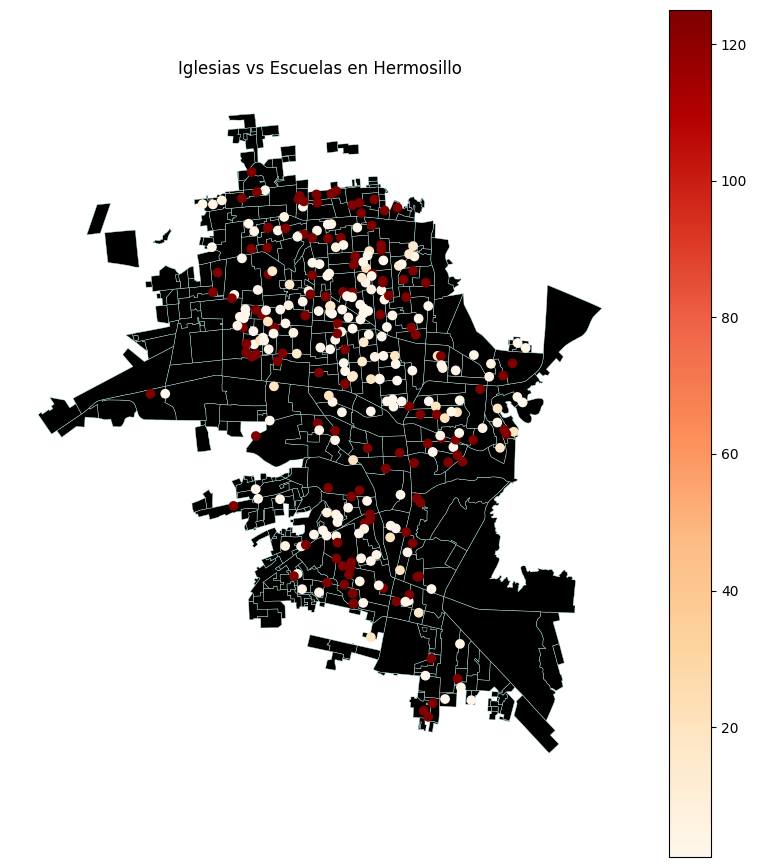

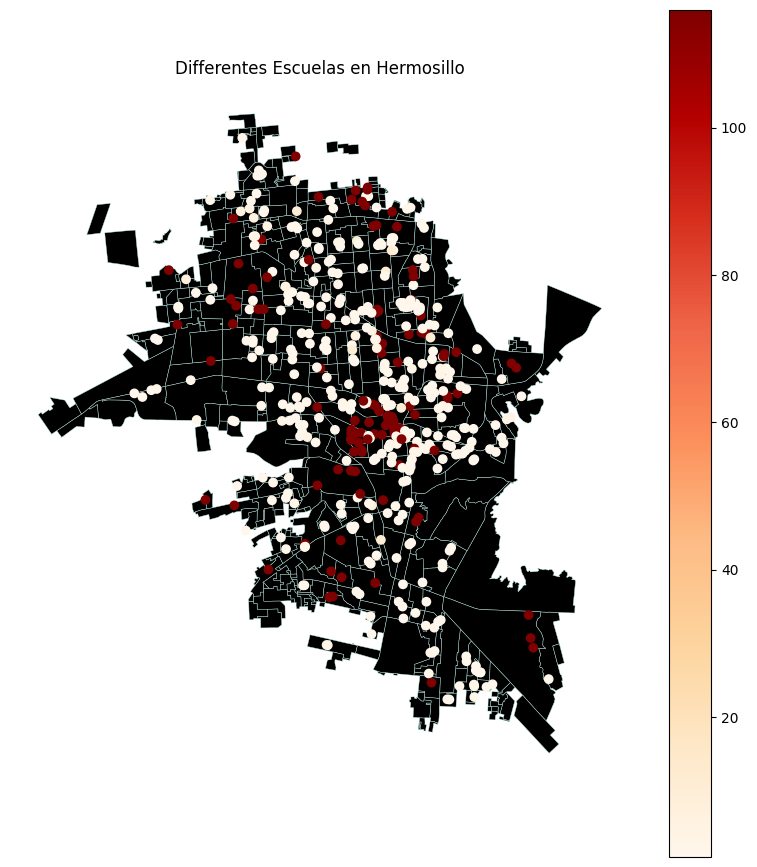

In [139]:
fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Iglesias vs Escuelas en Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='black',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila)


iglesias.plot(column='NUMERO_DE_IGLESIAS',
              cmap='OrRd',
              legend=True,
              ax=fila)


plt.show()


fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Differentes Escuelas en Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='black',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila)


escuelas.plot(column='NUMERO_DE_ESCUELAS',
              cmap='OrRd',
              legend=True,
              ax=fila)


plt.show()


## Ejercicio 4

In [140]:
import contextily as ctx

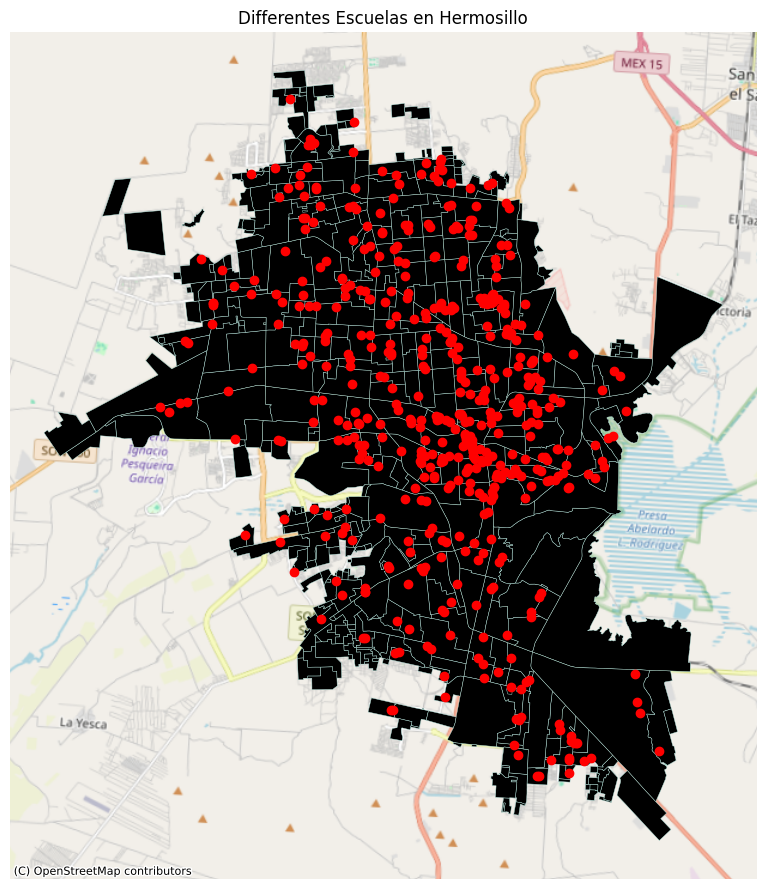

In [146]:
fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Differentes Escuelas en Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='black',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila)


escuelas.plot(color='red',
              ax=fila)


ctx.add_basemap(
    fila,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=ageb_hermosillo.crs.to_string()
)
plt.show()



In [ ]:
fig , fila = plt.subplots(1, figsize=(10,11))

plt.title('Differentes Escuelas en Hermosillo')
plt.axis('off')
ageb_hermosillo.plot( 
        facecolor='black',
        linewidth=0.3,
        edgecolor='#B9EBE3',
        ax=fila)


escuelas.plot(color='red',
              ax=fila)


ctx.add_basemap(
    fila,
    source=ctx.providers.OpenStreetMap,
    crs=ageb_hermosillo.crs.to_string()
)
plt.show()

